# Lab 1

### Load the data

Import the libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use pandas.read_csv to read the csv file

In [4]:
data = pd.read_csv('uber-raw-data-apr145f7ee72f859a747b6d3d9b360166c54d1876a9e6a703e6b068baa29430ac728a.csv')

### Perform data transformation

1. Use .map(pandas.to_datetime) for better date transformation

In [5]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

2. Creating a function for finding the day of the month example: def get_dom(dt): return dt.day data['dom'] = data['Date/Time'].map(get_dom)

In [6]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

3. Creating a function for finding the weekday and hours example: def get_weekday(dt): return dt.weekday() data['weekday']= data['Date/Time'].map(get_weekday)

In [8]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

4. Analyse the day of month

In [13]:
day_of_month_counts = data['dom'].value_counts().sort_index()
print(day_of_month_counts)

1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
Name: dom, dtype: int64


### Visual representation

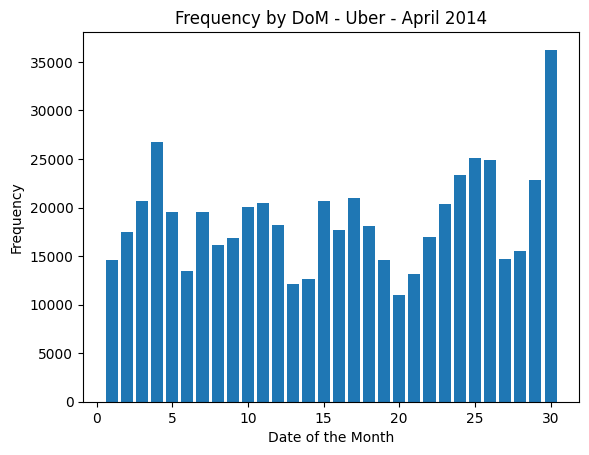

In [15]:
plt.hist(data['dom'], bins=30, rwidth=0.8, range=(0.5, 30.5))
plt.xlabel('Date of the Month')
plt.ylabel('Frequency')
plt.title('Frequency by DoM - Uber - April 2014')
plt.show()

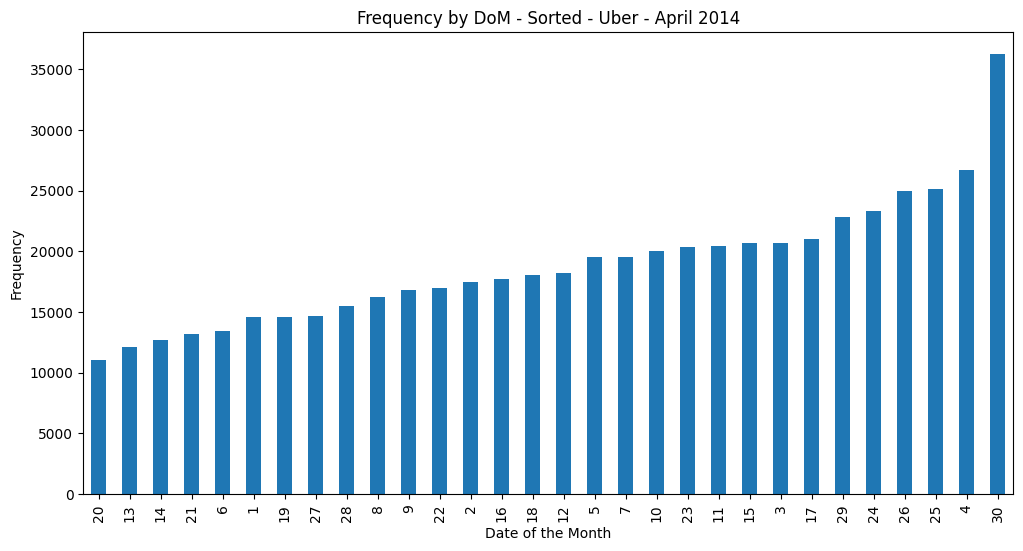

In [16]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date_sorted = by_date.sort_values()
plt.figure()
by_date_sorted.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Date of the Month')
plt.ylabel('Frequency')
plt.title('Frequency by DoM - Sorted - Uber - April 2014')
plt.show()

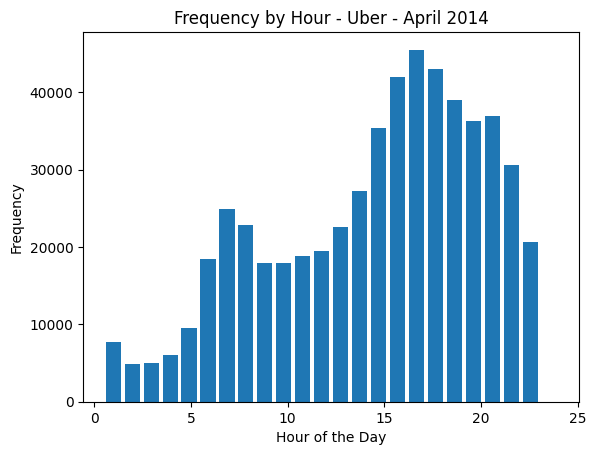

In [17]:
plt.figure()
plt.hist(data['Date/Time'].dt.hour, bins=24, range=(0.5, 24), rwidth=0.8)
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency by Hour - Uber - April 2014')
plt.show()

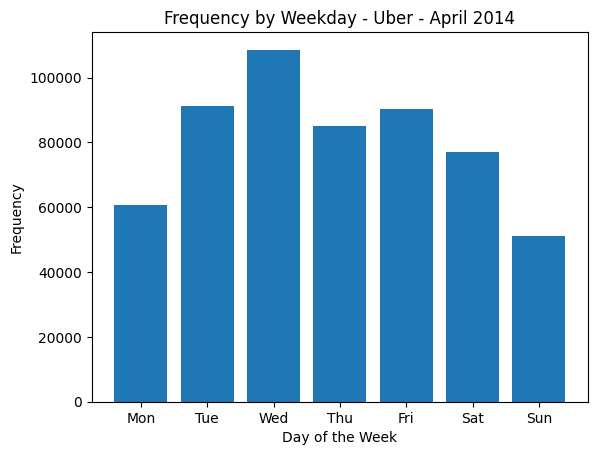

In [18]:
plt.figure()
plt.hist(data['weekday'], bins=7, range=(-0.5, 6.5), rwidth=0.8)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency by Weekday - Uber - April 2014')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.show()

### Performing Cross Analysis

In [20]:
def count_rows(rows):
    return len(rows)

by_weekday_hour = data.groupby(['weekday', data['Date/Time'].dt.hour]).apply(count_rows).unstack()

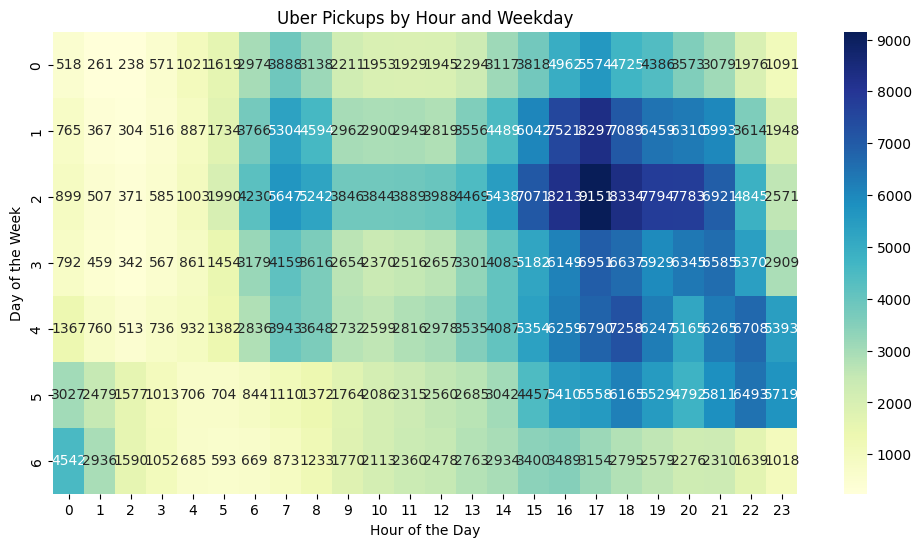

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(by_weekday_hour, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Uber Pickups by Hour and Weekday')
plt.show()

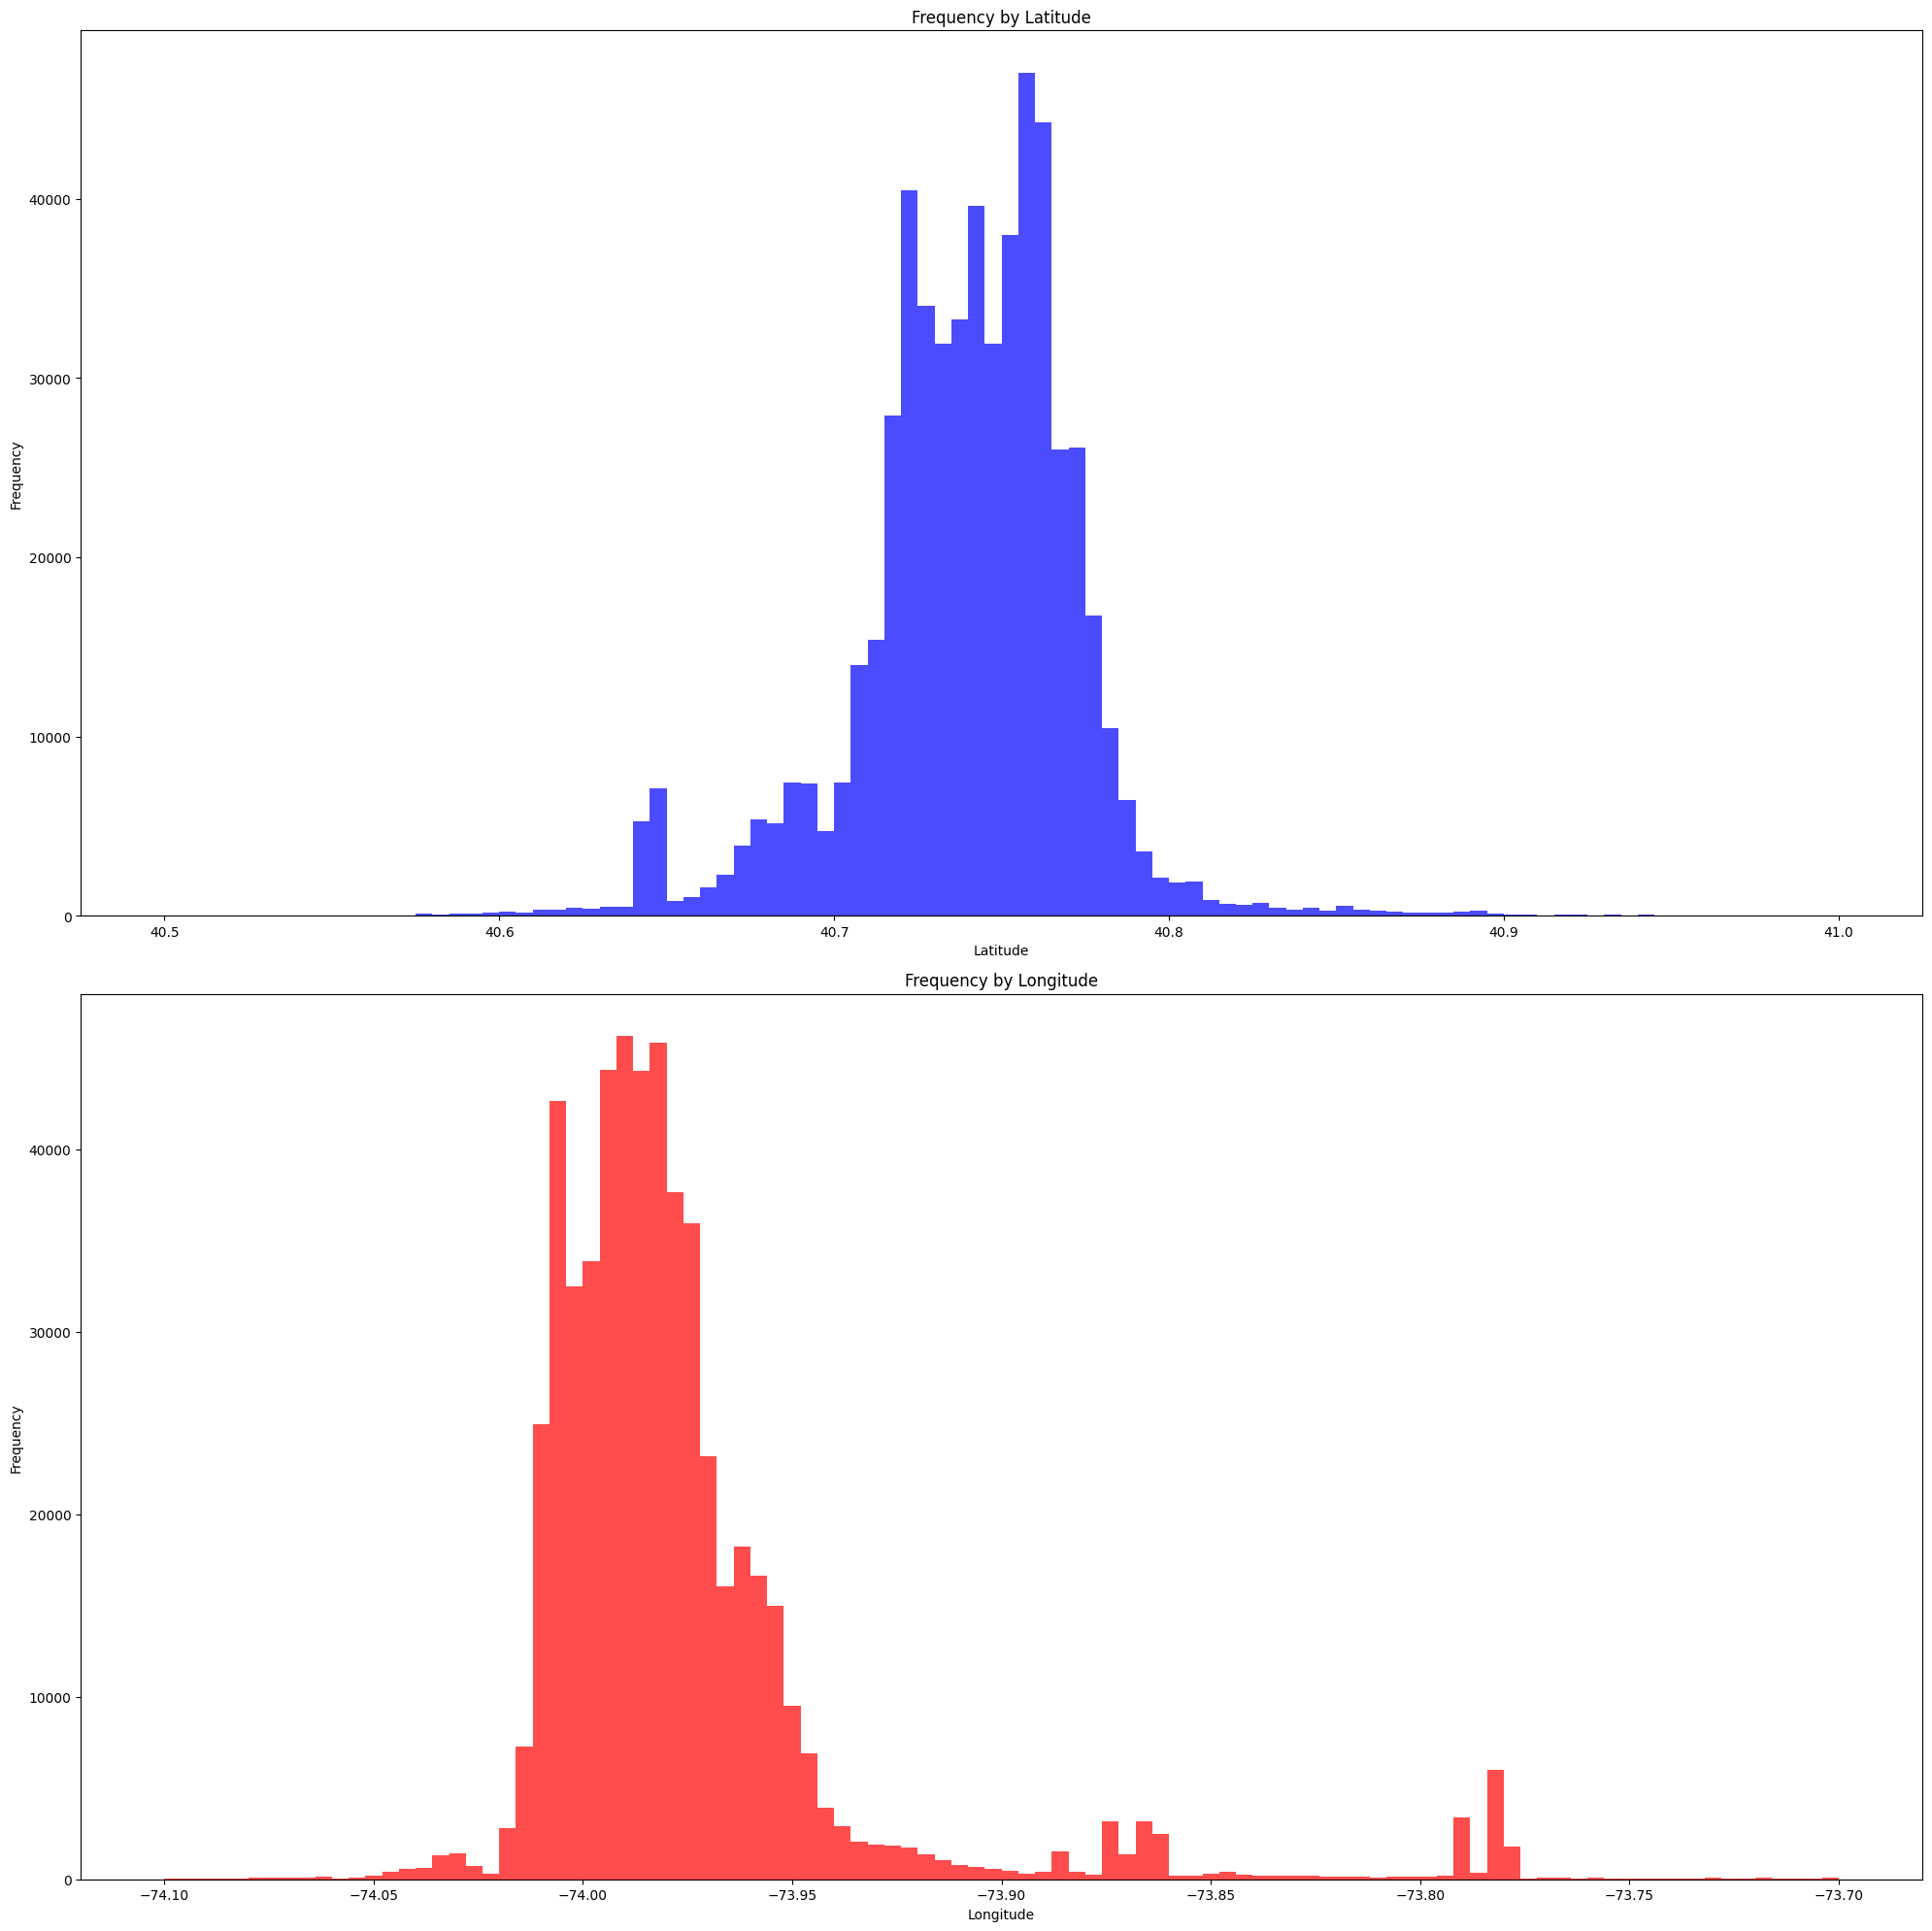

In [24]:
latitude_range = (40.5, 41)
longitude_range = (-74.1, -73.7)

plt.figure(figsize=(20, 20))

# Latitude histogram
plt.subplot(2, 1, 1)
plt.hist(data['Lat'], bins=100, range=latitude_range, color='blue', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Frequency by Latitude')

# Longitude histogram
plt.subplot(2, 1, 2)
plt.hist(data['Lon'], bins=100, range=longitude_range, color='red', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Frequency by Longitude')

plt.tight_layout()
plt.show()